In [125]:
# load 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [126]:
def list_corr(inputs_temps):
    
    pairs = []
    for i in range(inputs_temps.shape[1]):
        for j in range(i+1, inputs_temps.shape[1]):
            coor = inputs_temps[inputs_temps.columns[i]].corr(inputs_temps[inputs_temps.columns[j]])
            pairs.append((inputs_temps.columns[i], inputs_temps.columns[j], coor))
    
    # sort by correlation
    # remove nan values 
    pairs = [pair for pair in pairs if not np.isnan(pair[2])]
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    return pairs


In [127]:
data = pd.read_csv('../raw/data.csv')

In [128]:
output_cols = [col for col in data.columns if col.startswith("PERF_")]
input_cols = [col for col in data.columns if col not in output_cols]

outputs = data[output_cols]
inputs = data[input_cols]

rm = ["PROC_", "HIDDEN_", "PERF_","_N_filaments"]
for irm in rm:
    inputs.columns = [icol.replace(irm, "") for icol in inputs.columns]
    outputs.columns = [icol.replace(irm, "") for icol in outputs.columns]

    data.columns = [icol.replace(irm, "") for icol in data.columns]



/tmp/ipykernel_4067922/817770179.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  inputs.hist(ax=fig.gca());


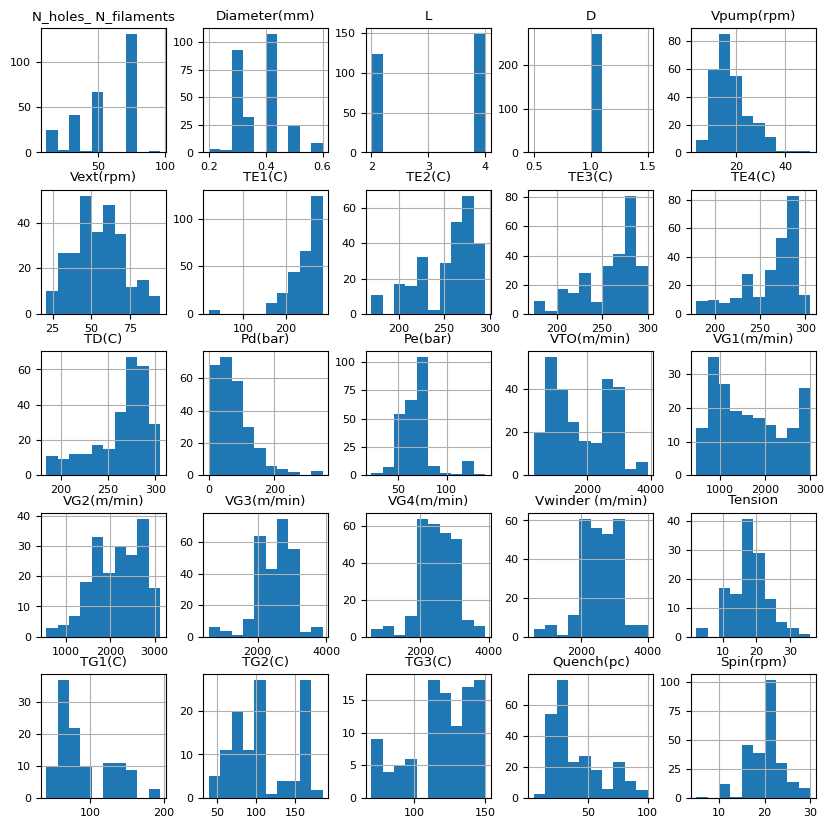

In [129]:
# Veamos un histogramas de los inputs 
fig = plt.figure(figsize=(10, 10))
# default fontsize
plt.rcParams.update({'font.size': 8})
inputs.hist(ax=fig.gca());

In [130]:
inputs

,material,N_holes_ N_filaments,Diameter(mm),L,D,Vpump(rpm),Vext(rpm),TE1(C),TE2(C),TE3(C),...,VG2(m/min),VG3(m/min),VG4(m/min),Vwinder (m/min),Tension,TG1(C),TG2(C),TG3(C),Quench(pc),Spin(rpm)
0,PET HAC,72,0.3,2,1,19.0,40.0,285,290.0,295.0,...,3125.0,3390.0,3360,3550.0,NaN,NaN,NaN,NaN,NaN,NaN
1,PP HP 561R,12,0.5,4,1,33.0,58.5,195,195.0,200.0,...,2349.0,2661.0,2558,2590.0,NaN,NaN,NaN,NaN,NaN,NaN
2,PLA L130,36,0.3,2,1,20.0,44.0,225,215.0,220.0,...,2820.0,2980.0,2960,3050.0,NaN,NaN,NaN,NaN,NaN,NaN
3,CoPET,72,0.3,2,1,21.0,47.0,250,265.0,265.0,...,2700.0,2950.0,2940,3050.0,NaN,NaN,NaN,NaN,NaN,NaN
4,PP HP 561S,72,0.6,4,1,33.0,80.0,230,230.0,235.0,...,1770.0,2120.0,2010,2080.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,PLA+10pcSIL,48,0.4,2,1,11.0,50.0,210,215.0,220.0,...,1800.0,2050.0,2050,2109.0,NaN,70.0,100.0,131.0,30.0,18.0
267,PLA+10pcSIL,48,0.4,2,1,13.0,55.0,210,215.0,220.0,...,1300.0,2350.0,2500,2573.0,NaN,70.0,100.0,131.0,30.0,18.0
268,rPET,72,0.3,2,1,13.0,74.0,280,285.0,290.0,...,NaN,2915.0,2815,3000.0,14.0,NaN,NaN,NaN,30.0,20.0
269,rPET,72,0.3,2,1,13.0,79.0,280,288.0,292.0,...,NaN,2817.0,2793,2920.0,14.0,NaN,NaN,NaN,30.0,18.0


/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


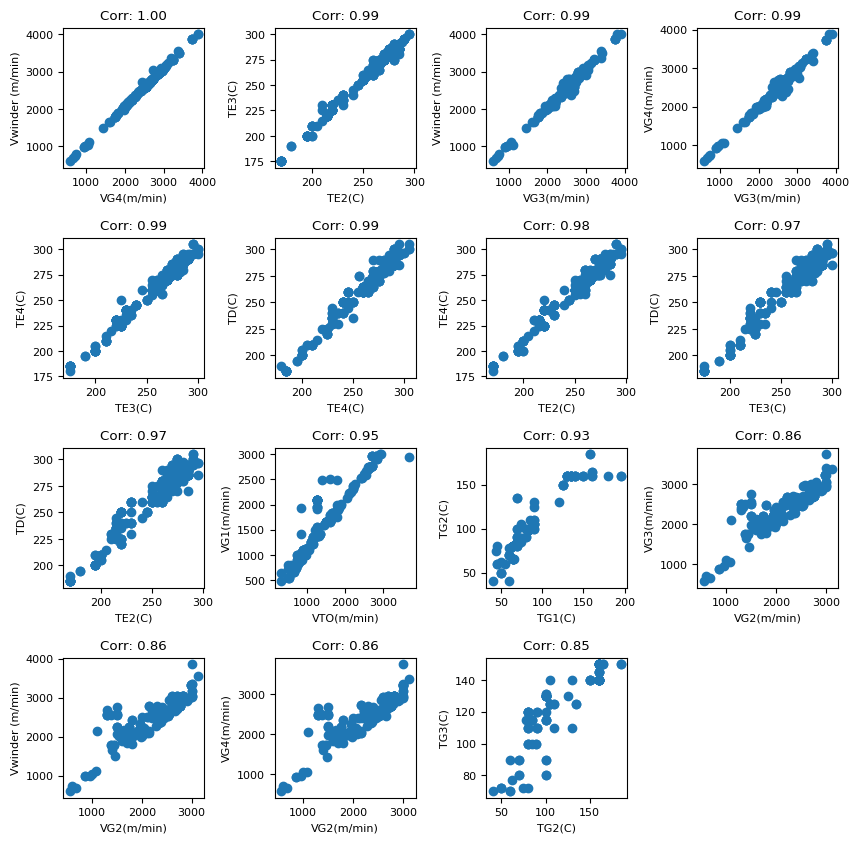

In [131]:
icor = inputs.copy()
icor.pop("material")
cor = list_corr(icor)

fig = plt.figure(figsize=(10, 10))
# padding between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
nc = 15
nc_sq = int(np.ceil(np.sqrt(nc)))
nc_sq = nc_sq 
for i in range(nc):
    plt.subplot(nc_sq, nc_sq, i+1)
    x = cor[i][0]
    y = cor[i][1]
    plt.plot(inputs[x], inputs[y], 'o')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Corr: {:.2f}".format(cor[i][2]))

In [132]:
inputs.columns

Index(['material', 'N_holes_ N_filaments', 'Diameter(mm)', 'L', 'D',
       'Vpump(rpm)', 'Vext(rpm)', 'TE1(C)', 'TE2(C)', 'TE3(C)', 'TE4(C)',
       'TD(C)', 'Pd(bar)', 'Pe(bar)', 'VTO(m/min)', 'VG1(m/min)', 'VG2(m/min)',
       'VG3(m/min)', 'VG4(m/min)', 'Vwinder (m/min)', 'Tension', 'TG1(C)',
       'TG2(C)', 'TG3(C)', 'Quench(pc)', 'Spin(rpm)'],
      dtype='object')

In [133]:
inputs.pop("VG4(m/min)")
inputs.pop("VG3(m/min)")
inputs.pop("TE3(C)")
inputs.pop("TE4(C)")
inputs.pop("TD(C)")
inputs.pop("TG1(C)")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
266    70.0
267    70.0
268     NaN
269     NaN
270    90.0
Name: TG1(C), Length: 271, dtype: float64

In [134]:
inputs["D"].value_counts()

D
1    271
Name: count, dtype: int64

In [135]:
data.pop("VG4(m/min)")
data.pop("VG3(m/min)")
data.pop("TE3(C)")
data.pop("TE4(C)")
data.pop("TD(C)")
data.pop("TG1(C)")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
266    70.0
267    70.0
268     NaN
269     NaN
270    90.0
Name: TG1(C), Length: 271, dtype: float64

In [136]:
materials = data['material'].unique()

datasets = []
for material in materials:
    sample = data[data['material'] == material]
    datasets.append(sample)

In [137]:
datasets = [dataset for dataset in datasets if len(dataset) > 5]

In [138]:
def reducedataset(sample):

    columns = sample.columns

    constants = {}
    for col in columns:

        if sample[col].nunique() == 1:
            constants[col] = sample[col].unique()[0]
            sample = sample.drop(col, axis=1)
    # remove the columns that are all nan values
    sample = sample.dropna(axis=1, how='all')
    return sample, constants
        

In [139]:
ilist_coor = list_corr(inputs.iloc[:,1:])


/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: Runti

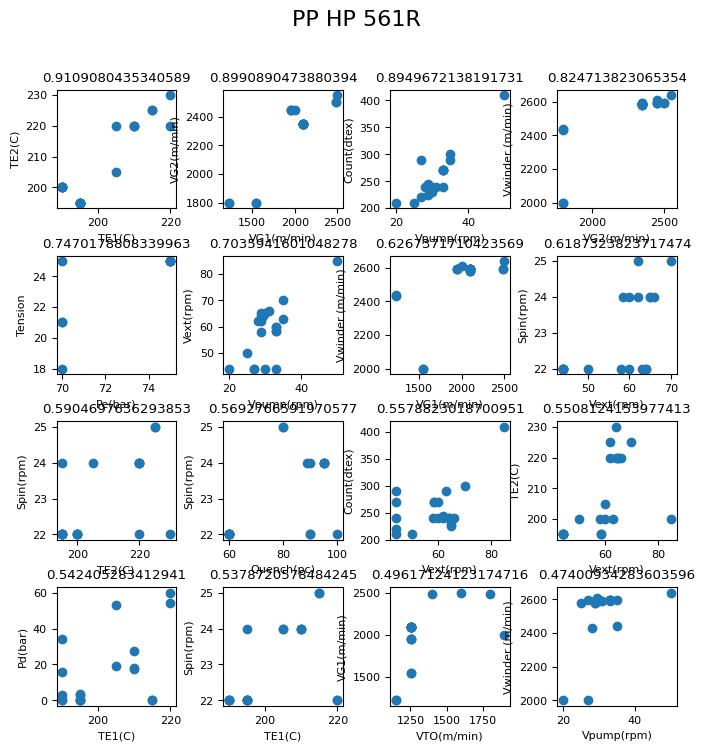

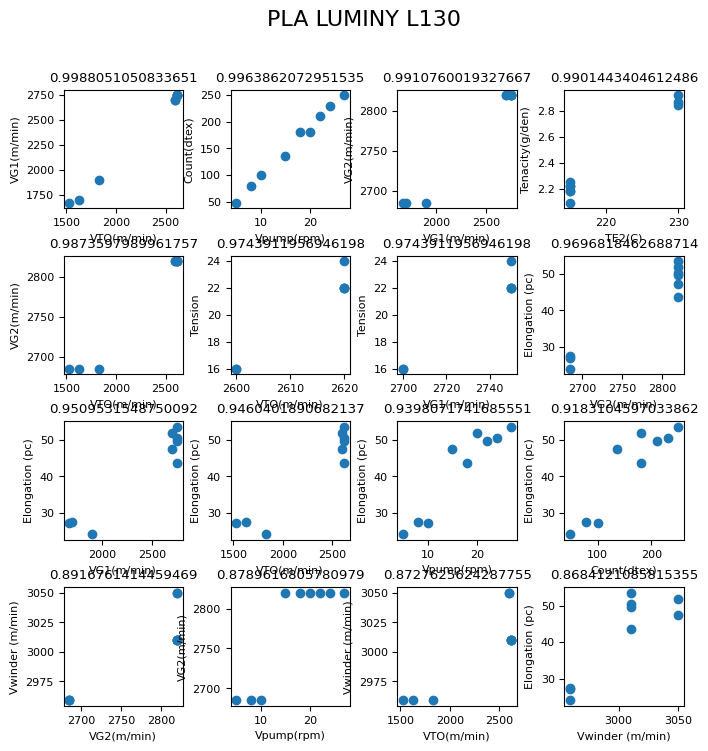

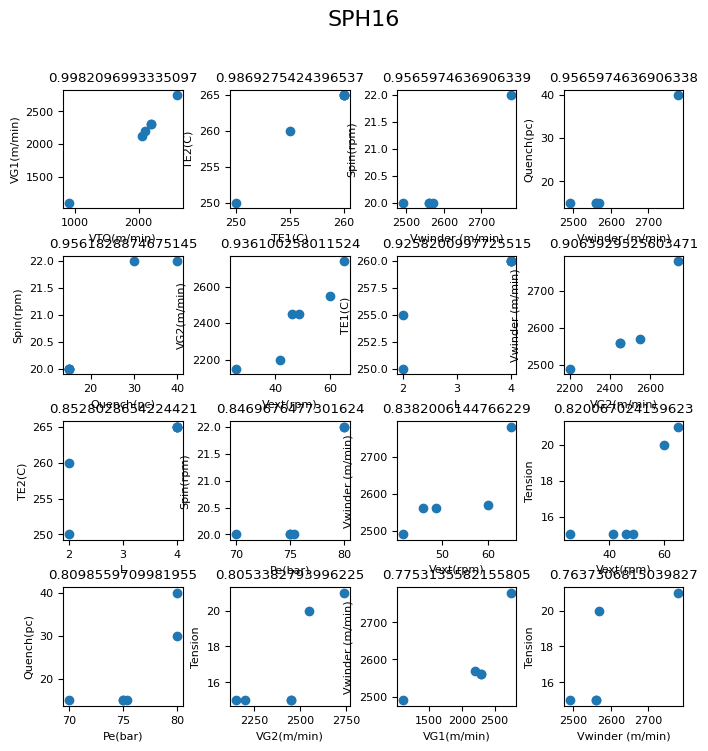

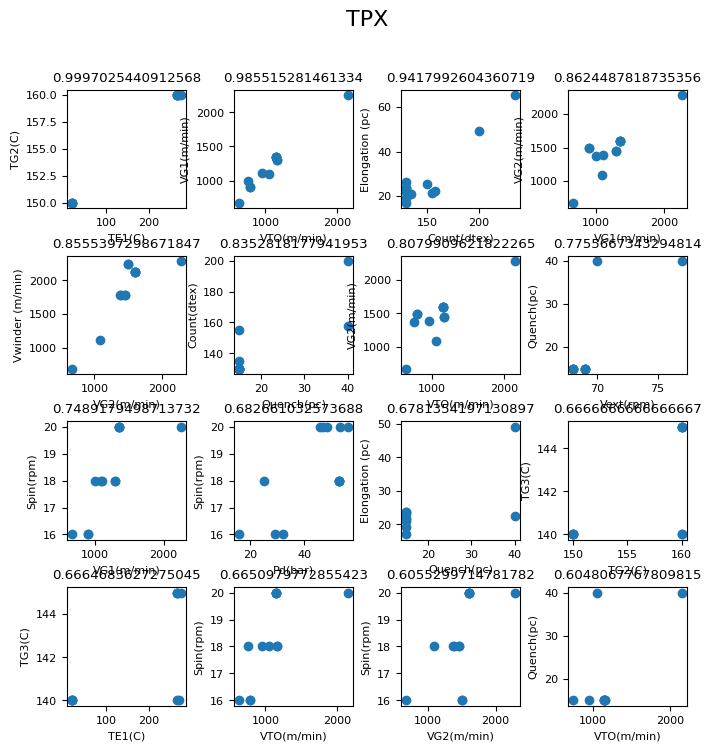

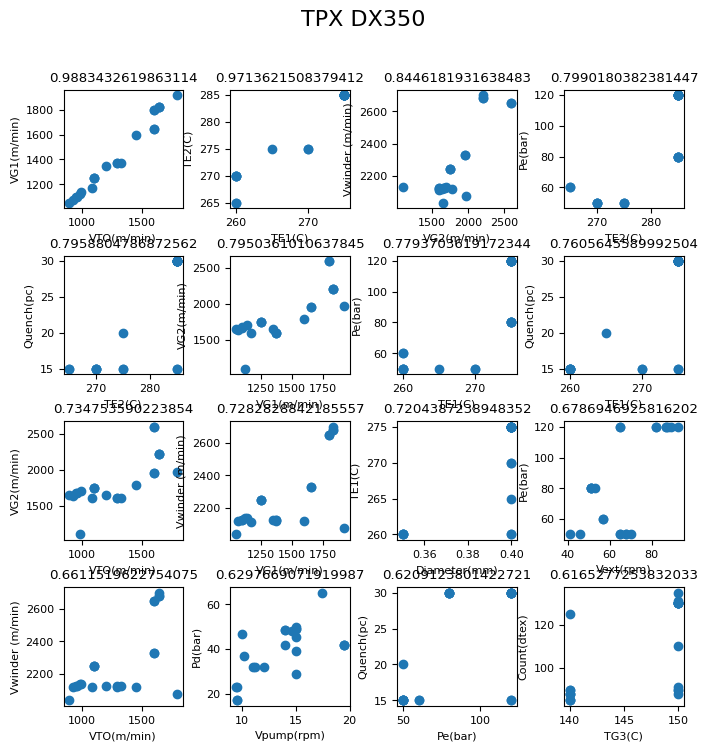

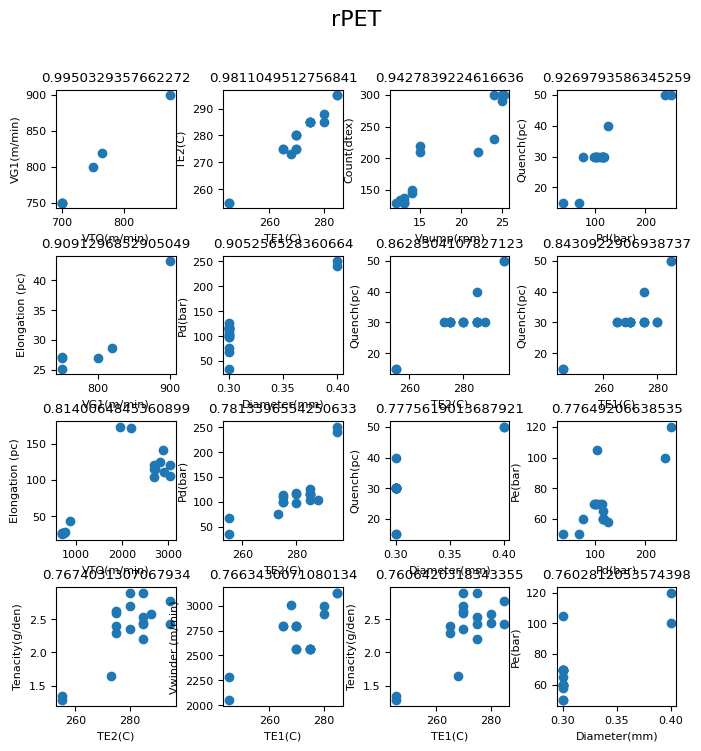

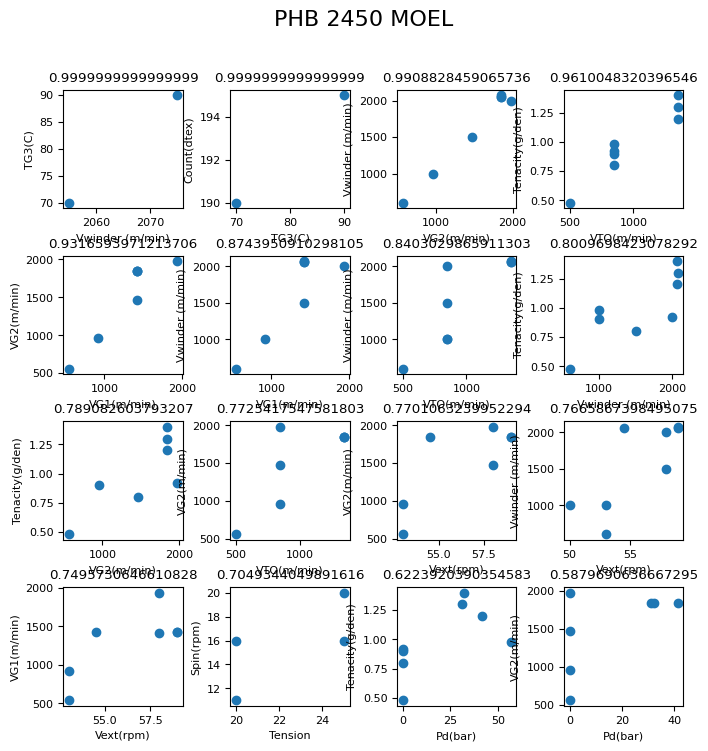

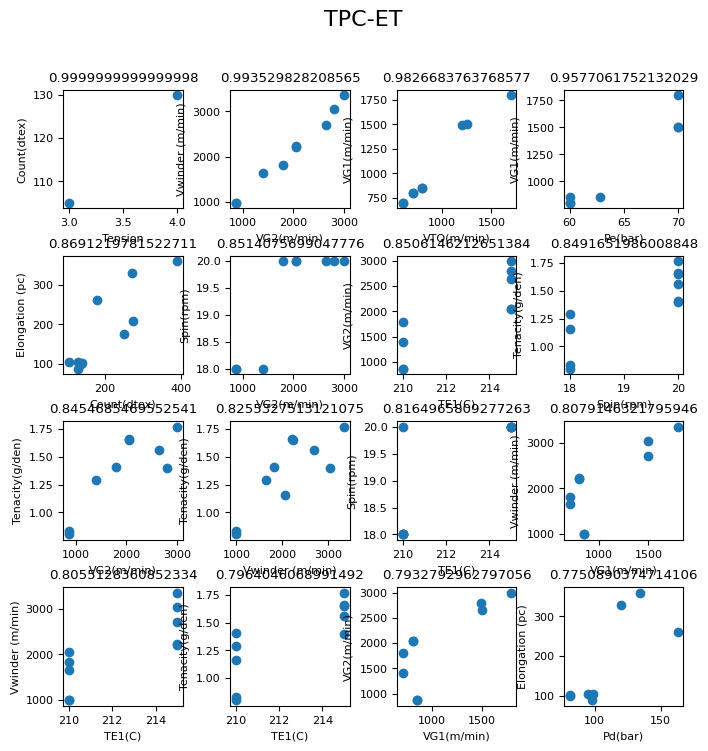

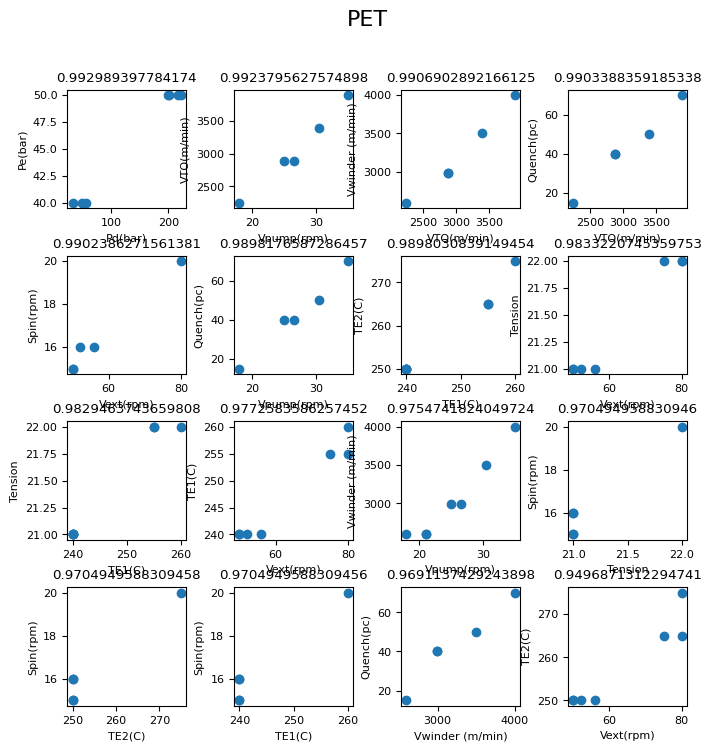

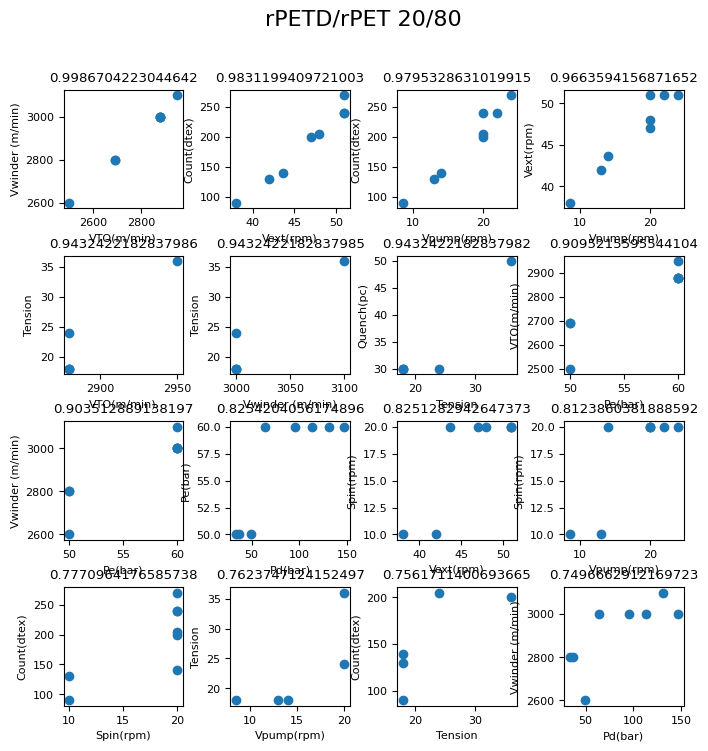

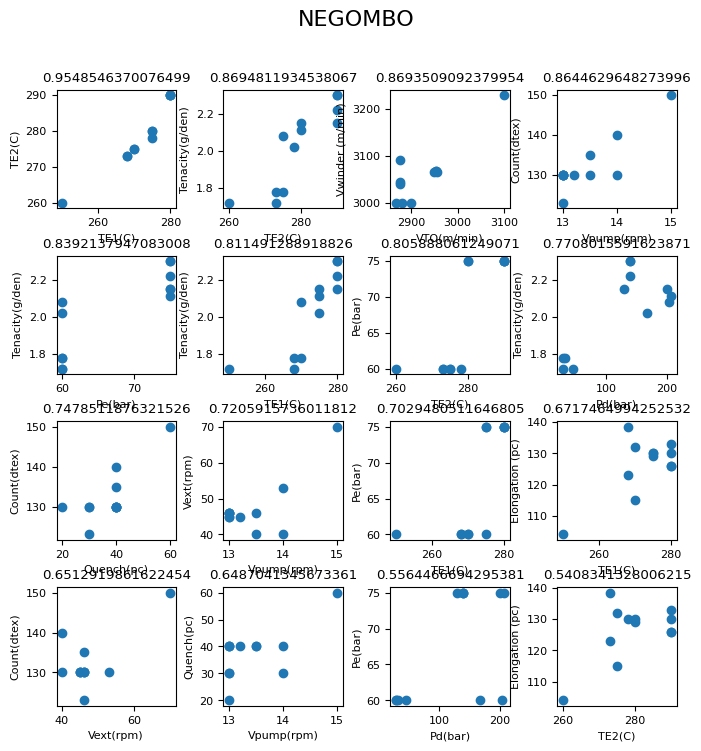

In [140]:
idataset = datasets[0]


best = []

list_list_coor = []
for idataset in datasets:
    idataset, constants = reducedataset(idataset)
    ilist_coor = list_corr(idataset.iloc[:,1:])
    N = 9
    Nq = int(np.sqrt(N) + 1)

    best.append(ilist_coor[:N])
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    # subtitle
    fig.suptitle(constants['material'], fontsize=16)
    for i in range(Nq):
        for j in range(Nq):
            plt.subplot(Nq, Nq, i*Nq + j + 1)
            plt.scatter(idataset[ilist_coor[i*Nq + j][0]], 
                        idataset[ilist_coor[i*Nq + j][1]])
            plt.title(ilist_coor[i*Nq + j][2])
            plt.xlabel(ilist_coor[i*Nq + j][0])
            plt.ylabel(ilist_coor[i*Nq + j][1])

In [141]:
best[0]

[('TE1(C)', 'TE2(C)', np.float64(0.9109080435340589)),
 ('VG1(m/min)', 'VG2(m/min)', np.float64(0.8990890473880394)),
 ('Vpump(rpm)', 'Count(dtex)', np.float64(0.8949672138191731)),
 ('VG2(m/min)', 'Vwinder (m/min)', np.float64(0.824713823065354)),
 ('Pe(bar)', 'Tension', np.float64(0.7470178808339963)),
 ('Vpump(rpm)', 'Vext(rpm)', np.float64(0.7035941601048278)),
 ('VG1(m/min)', 'Vwinder (m/min)', np.float64(0.6267371710423569)),
 ('Vext(rpm)', 'Spin(rpm)', np.float64(0.6187323823717474)),
 ('TE2(C)', 'Spin(rpm)', np.float64(0.5904697636293853))]

In [142]:
best[1]

[('VTO(m/min)', 'VG1(m/min)', np.float64(0.9988051050833651)),
 ('Vpump(rpm)', 'Count(dtex)', np.float64(0.9963862072951535)),
 ('VG1(m/min)', 'VG2(m/min)', np.float64(0.9910760019327667)),
 ('TE2(C)', 'Tenacity(g/den)', np.float64(0.9901443404612486)),
 ('VTO(m/min)', 'VG2(m/min)', np.float64(0.9873597989961757)),
 ('VTO(m/min)', 'Tension', np.float64(0.9743911956946198)),
 ('VG1(m/min)', 'Tension', np.float64(0.9743911956946198)),
 ('VG2(m/min)', 'Elongation (pc)', np.float64(0.9696818462688714)),
 ('VG1(m/min)', 'Elongation (pc)', np.float64(0.9509531548750092))]

In [143]:
best[2]

[('VTO(m/min)', 'VG1(m/min)', np.float64(0.9982096993335097)),
 ('TE1(C)', 'TE2(C)', np.float64(0.9869275424396537)),
 ('Vwinder (m/min)', 'Spin(rpm)', np.float64(0.9565974636906339)),
 ('Vwinder (m/min)', 'Quench(pc)', np.float64(0.9565974636906338)),
 ('Quench(pc)', 'Spin(rpm)', np.float64(0.9561828874675145)),
 ('Vext(rpm)', 'VG2(m/min)', np.float64(0.936100258011524)),
 ('L', 'TE1(C)', np.float64(0.9258200997725515)),
 ('VG2(m/min)', 'Vwinder (m/min)', np.float64(0.9063929525603471)),
 ('L', 'TE2(C)', np.float64(0.8528028654224421))]